In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor


In [2]:
data = pd.read_csv("DOGE-USD.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-09,0.001207,0.001415,0.001181,0.001415,0.001415,6259550.0
1,2017-11-10,0.001421,0.001431,0.001125,0.001163,0.001163,4246520.0
2,2017-11-11,0.001146,0.001257,0.001141,0.001201,0.001201,2231080.0
3,2017-11-12,0.001189,0.001210,0.001002,0.001038,0.001038,3288960.0
4,2017-11-13,0.001046,0.001212,0.001019,0.001211,0.001211,2481270.0


In [4]:
data['Date'] = pd.to_datetime(data['Date'])
data['Date'] = data['Date'].apply(lambda x: x.timestamp())
correlation_matrix = data.corr()
print(correlation_matrix)


               Date      Open      High       Low     Close  Adj Close  \
Date       1.000000  0.594957  0.581467  0.609662  0.594167   0.594167   
Open       0.594957  1.000000  0.993904  0.993707  0.992514   0.992514   
High       0.581467  0.993904  1.000000  0.986497  0.995104   0.995104   
Low        0.609662  0.993707  0.986497  1.000000  0.994575   0.994575   
Close      0.594167  0.992514  0.995104  0.994575  1.000000   1.000000   
Adj Close  0.594167  0.992514  0.995104  0.994575  1.000000   1.000000   
Volume     0.243328  0.554850  0.619321  0.519991  0.588678   0.588678   

             Volume  
Date       0.243328  
Open       0.554850  
High       0.619321  
Low        0.519991  
Close      0.588678  
Adj Close  0.588678  
Volume     1.000000  


In [5]:
data.corr()


,Date,Open,High,Low,Close,Adj Close,Volume
Date,1.000000,0.594957,0.581467,0.609662,0.594167,0.594167,0.243328
Open,0.594957,1.000000,0.993904,0.993707,0.992514,0.992514,0.554850
High,0.581467,0.993904,1.000000,0.986497,0.995104,0.995104,0.619321
Low,0.609662,0.993707,0.986497,1.000000,0.994575,0.994575,0.519991
Close,0.594167,0.992514,0.995104,0.994575,1.000000,1.000000,0.588678
Adj Close,0.594167,0.992514,0.995104,0.994575,1.000000,1.000000,0.588678
Volume,0.243328,0.554850,0.619321,0.519991,0.588678,0.588678,1.000000


In [6]:
data['Date'] = pd.to_datetime(data['Date'],
							infer_datetime_format=True)
data.set_index('Date', inplace=True)

data.isnull().any()


<ipython-input-6-5e308f85a602>:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data['Date'] = pd.to_datetime(data['Date'],


,0
Open,True
High,True
Low,True
Close,True
Adj Close,True
Volume,True


In [7]:
data.isnull().sum()


,0
Open,1
High,1
Low,1
Close,1
Adj Close,1
Volume,1


In [8]:
data = data.dropna()


In [9]:
data.describe()


,Open,High,Low,Close,Adj Close,Volume
count,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1.760000e+03
mean,0.059575,0.063096,0.056126,0.059619,0.059619,1.016258e+09
std,0.101325,0.109152,0.093695,0.101379,0.101379,3.563999e+09
min,0.001046,0.001210,0.001002,0.001038,0.001038,1.431720e+06
25%,0.002550,0.002616,0.002500,0.002548,0.002548,2.307671e+07
50%,0.003476,0.003603,0.003356,0.003495,0.003495,8.981855e+07
75%,0.070633,0.075035,0.068478,0.070657,0.070657,6.565853e+08
max,0.687801,0.737567,0.608168,0.684777,0.684777,6.941068e+10


Text(0.5, 1.0, 'Date vs Close of 2021')

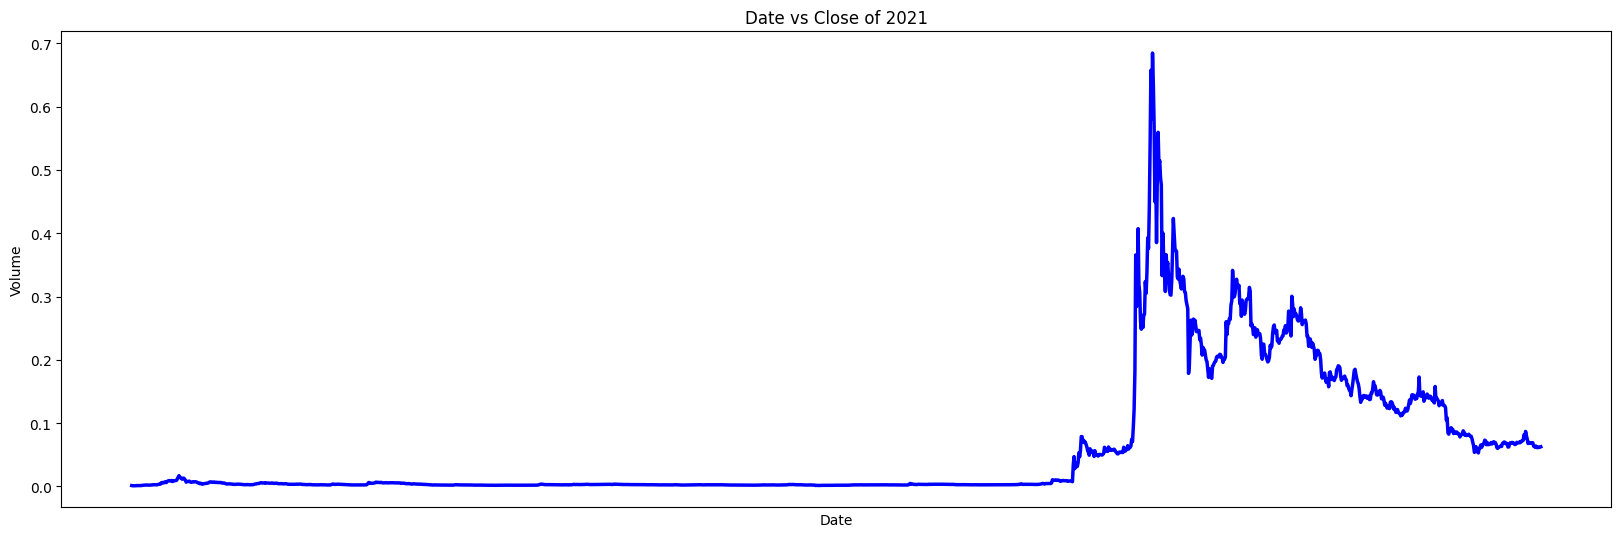

In [10]:
plt.figure(figsize=(20, 7))
x = data.groupby('Date')['Close'].mean()
x.plot(linewidth=2.5, color='b')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title("Date vs Close of 2021")


In [11]:
data["gap"] = (data["High"] - data["Low"]) * data["Volume"]
data["y"] = data["High"] / data["Volume"]
data["z"] = data["Low"] / data["Volume"]
data["a"] = data["High"] / data["Low"]
data["b"] = (data["High"] / data["Low"]) * data["Volume"]
abs(data.corr()["Close"].sort_values(ascending=False))


<ipython-input-11-425adacaf344>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["gap"] = (data["High"] - data["Low"]) * data["Volume"]
<ipython-input-11-425adacaf344>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["y"] = data["High"] / data["Volume"]
<ipython-input-11-425adacaf344>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

,Close
Close,1.000000
Adj Close,1.000000
High,0.995104
Low,0.994575
Open,0.992514
Volume,0.588678
b,0.456479
gap,0.383333
a,0.172057
z,0.063251


In [12]:
data = data[["Close", "Volume", "gap", "a", "b"]]
data.head()


,Close,Volume,gap,a,b
Date,,,,,
1970-01-01 00:00:01.510185600,0.001415,6259550.0,1464.73470,1.198137,7.499800e+06
1970-01-01 00:00:01.510272000,0.001163,4246520.0,1299.43512,1.272000,5.401573e+06
1970-01-01 00:00:01.510358400,0.001201,2231080.0,258.80528,1.101665,2.457903e+06
1970-01-01 00:00:01.510444800,0.001038,3288960.0,684.10368,1.207585,3.971698e+06
1970-01-01 00:00:01.510531200,0.001211,2481270.0,478.88511,1.189401,2.951226e+06


In [13]:
df2 = data.tail(30)
train = df2[:11]
test = df2[-19:]

print(train.shape, test.shape)


(11, 5) (19, 5)


In [14]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(endog=train["Close"], exog=train.drop(
	"Close", axis=1), order=(2, 1, 1))
results = model.fit()
print(results.summary())


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 86400N will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 86400N will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                   11
Model:               SARIMAX(2, 1, 1)   Log Likelihood                  47.663
Date:                Thu, 01 Aug 2024   AIC                            -79.326
Time:                        17:02:01   BIC                            -76.905
Sample:                    01-01-1970   HQIC                           -81.981
                         - 01-01-1970                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Volume      7.491e-10   1.84e-10      4.077      0.000    3.89e-10    1.11e-09
gap          1.13e-08   2.45e-09      4.615      0.000     6.5e-09    1.61e-08
a             -0.0073   5.05e-15  -1.44e+12      0.0

In [15]:
start = 11
end = 29
predictions = results.predict(
	start=start,
	end=end,
	exog=test.drop("Close", axis=1))
predictions


,predicted_mean
1970-01-01 00:00:01.660608000,0.097293
1970-01-01 00:00:01.660694400,0.083717
1970-01-01 00:00:01.660780800,0.075957
1970-01-01 00:00:01.660867200,0.069575
1970-01-01 00:00:01.660953600,0.071583
1970-01-01 00:00:01.661040000,0.072099
1970-01-01 00:00:01.661126400,0.071244
1970-01-01 00:00:01.661212800,0.072458
1970-01-01 00:00:01.661299200,0.072406
1970-01-01 00:00:01.661385600,0.071893


In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

mae = mean_absolute_error(test["Close"], predictions)
mse = mean_squared_error(test["Close"], predictions)
rmse = sqrt(mse)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')

Mean Absolute Error: 0.006036565600798865
Mean Squared Error: 4.842857428089586e-05
Root Mean Squared Error: 0.006959064181403693


<Axes: xlabel='Date'>

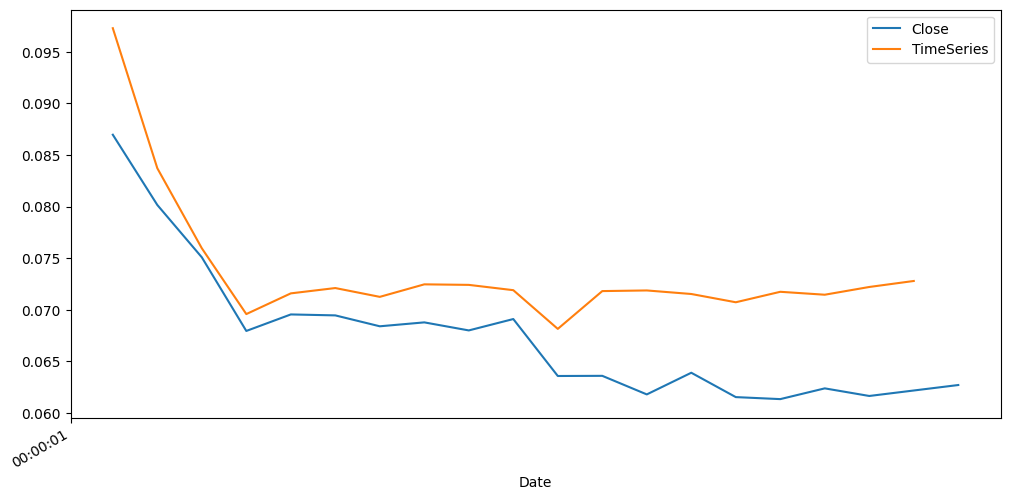

In [16]:
test["Close"].plot(legend=True, figsize=(12, 6))
predictions.plot(label='TimeSeries', legend=True)


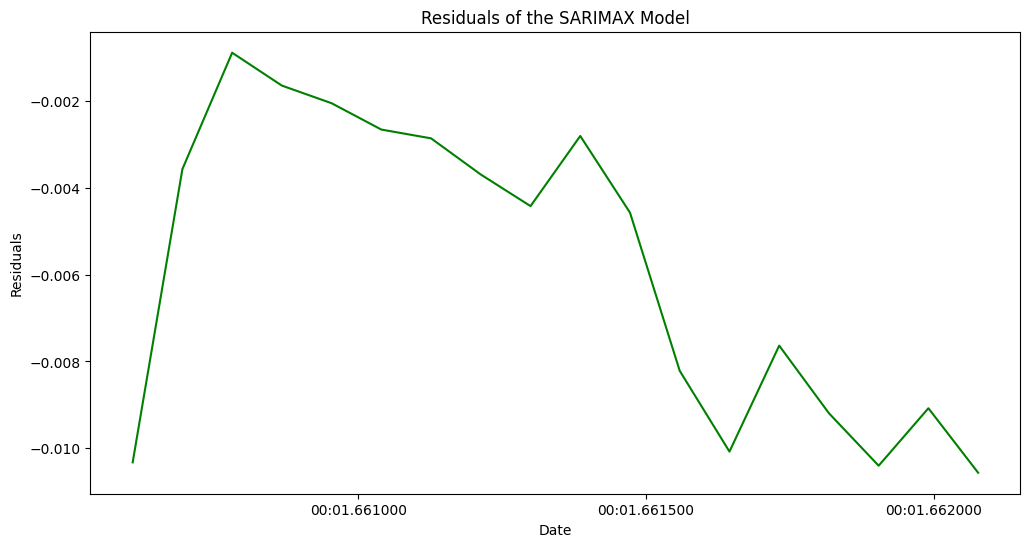

In [17]:
residuals = test["Close"] - predictions
plt.figure(figsize=(12, 6))
plt.plot(residuals, color='green')
plt.title('Residuals of the SARIMAX Model')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.show()


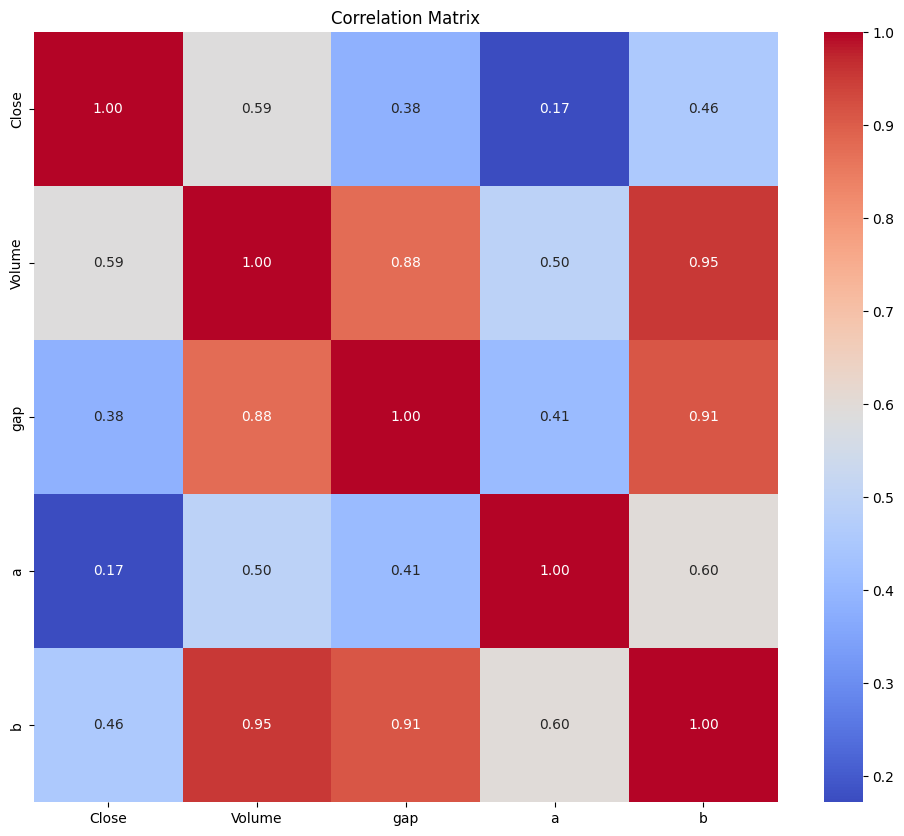

In [22]:
import seaborn as sns

# Assuming features are in the DataFrame `data`
corr_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


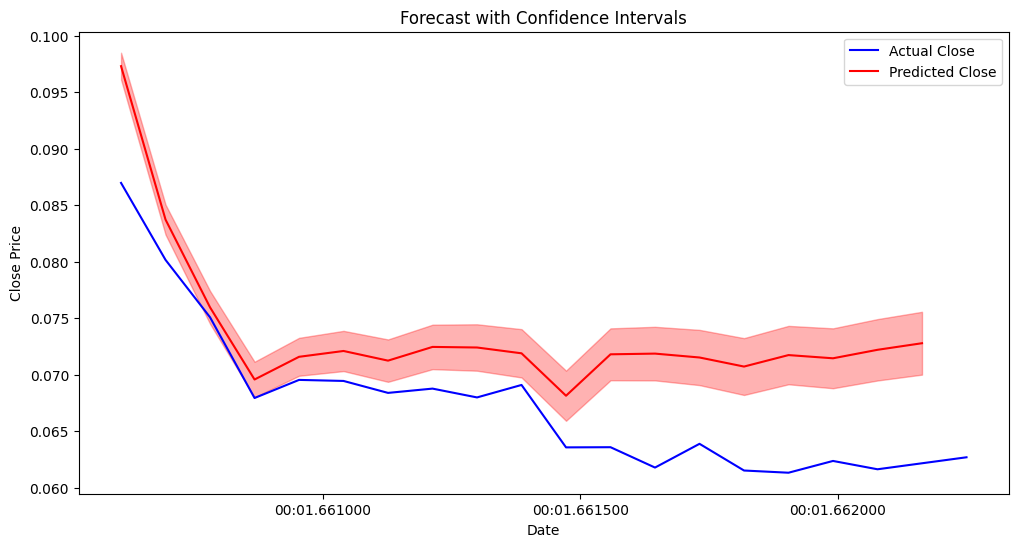

In [23]:
forecast = results.get_forecast(steps=len(test), exog=test.drop("Close", axis=1))
forecast_conf_int = forecast.conf_int()

plt.figure(figsize=(12, 6))
plt.plot(test.index, test["Close"], label='Actual Close', color='blue')
plt.plot(predictions.index, predictions, label='Predicted Close', color='red')
plt.fill_between(forecast_conf_int.index, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='red', alpha=0.3)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Forecast with Confidence Intervals')
plt.legend()
plt.show()
